In [1]:
import sys
import os
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('axes', grid=True)

from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon')

In [2]:
root_dir = 'C:/Users/delst/OneDrive/Desktop/Code/Workspace/NLP_Disaster_Tweets'
sys.path.append(root_dir)

from A_Main.Configurations.setup_env import setup_environment
config = setup_environment(root_dir)

# File Paths
sdo_pkl = config.sdo_pkl
sdo_parq = config.sdo_parq

glove_input_dir = config.GloVe_input_dir
glove_output_dir = config.GloVe_output_dir

# Class Imports
from Modularization.corpus_creation import load_corpus_bow

fig_size = config.fig_size_m

---

In [3]:
filename = 'F1_Preprocessing/train.parquet'
path_to_parq_store = os.path.join(sdo_parq, filename)

df_train = pd.read_parquet(path_to_parq_store)

In [4]:
display(df_train.head())

,keyword,text,target,tokens,hashtags,mentions,questions,exclamations,tokens_lemm
25,ablaze,we always try to bring the heavy #metal #rt,0,"[always, try, bring, heavy, #metal, #rt]","[#metal, #rt]",[],[],[],"[always, try, bring, heavy, #metal, #rt]"
26,ablaze,#africanbaze breaking newsnigeria flag set abl...,1,"[#africanbaze, breaking, newsnigeria, flag, se...",[#africanbaze],[],[],[],"[#africanbaze, breaking, newsnigeria, flag, se..."
27,ablaze,crying out for more! set me ablaze,0,"[crying, !, set, ablaze]",[],[],[],[!],"[cry, !, set, ablaze]"
28,ablaze,on plus side look at the sky last night it was...,0,"[plus, side, look, sky, last, night, ablaze]",[],[],[],[],"[plus, side, look, sky, last, night, ablaze]"
29,ablaze,@phdsquares #mufc they have built so much hype...,0,"[@phdsquares, #mufc, built, much, hype, around...",[#mufc],[@phdsquares],[],[],"[@phdsquares, #mufc, built, much, hype, around..."


In [5]:
corpus_doc_1, corpus_word_1, bow_1, bow_fd_1 = load_corpus_bow('1')
corpus_doc_0, corpus_word_0, bow_0, bow_fd_0 = load_corpus_bow('0')
corpus_word_sw, bow_sw, bow_fd_sw = load_corpus_bow('sw')

In [6]:
glove_features_tokens_file_path = os.path.join(sdo_pkl, 'glove_features_tokens.pkl')
glove_features_keyword_file_path = os.path.join(sdo_pkl, 'glove_features_keyword.pkl')

with open(glove_features_tokens_file_path, 'rb') as file:
    glove_features_tokens = pickle.load(file)
    
with open(glove_features_keyword_file_path, 'rb') as file:
    glove_features_keyword = pickle.load(file)

In [7]:
df = df_train
df

,keyword,text,target,tokens,hashtags,mentions,questions,exclamations,tokens_lemm
25,ablaze,we always try to bring the heavy #metal #rt,0,"[always, try, bring, heavy, #metal, #rt]","[#metal, #rt]",[],[],[],"[always, try, bring, heavy, #metal, #rt]"
26,ablaze,#africanbaze breaking newsnigeria flag set abl...,1,"[#africanbaze, breaking, newsnigeria, flag, se...",[#africanbaze],[],[],[],"[#africanbaze, breaking, newsnigeria, flag, se..."
27,ablaze,crying out for more! set me ablaze,0,"[crying, !, set, ablaze]",[],[],[],[!],"[cry, !, set, ablaze]"
28,ablaze,on plus side look at the sky last night it was...,0,"[plus, side, look, sky, last, night, ablaze]",[],[],[],[],"[plus, side, look, sky, last, night, ablaze]"
29,ablaze,@phdsquares #mufc they have built so much hype...,0,"[@phdsquares, #mufc, built, much, hype, around...",[#mufc],[@phdsquares],[],[],"[@phdsquares, #mufc, built, much, hype, around..."
...,...,...,...,...,...,...,...,...,...
6062,wrecked,@jt_ruff23 @cameronhacker and i wrecked you both,0,"[@jt_ruff23, @cameronhacker, wrecked]",[],"[@jt_ruff23, @cameronhacker]",[],[],"[@jt_ruff23, @cameronhacker, wrecked]"
6063,wrecked,three days off from work and they have pretty ...,0,"[three, days, work, pretty, much, wrecked, hah...",[],[],[],[],"[three, day, work, pretty, much, wrecked, haha..."
6064,wrecked,#fx #forex #trading cramer igers 3 words that ...,0,"[#fx, #forex, #trading, cramer, igers, 3, word...","[#fx, #forex, #trading]",[],[],[],"[#fx, #forex, #trading, cramer, igers, 3, word..."
6065,wrecked,@engineshed great atmosphere at the british li...,0,"[@engineshed, great, atmosphere, british, lion...",[],[@engineshed],[],[],"[@engineshed, great, atmosphere, british, lion..."


---

In [8]:
def count_occurrences(character, token_list):
    count = sum(1 for token in token_list if token.startswith(character))
    return count

# Apply function
df['num_hashtags'] = df['tokens'].apply(lambda x: count_occurrences('#', x))
df['num_mentions'] = df['tokens'].apply(lambda x: count_occurrences('@', x))
df['num_questions'] = df['tokens'].apply(lambda x: count_occurrences('?', x))
df['num_exclamations'] = df['tokens'].apply(lambda x: count_occurrences('!', x))

df['num_words'] = df['text'].apply(lambda x: len(x.split()))
df['num_letters'] = df['text'].apply(lambda x: len(x))
df

,keyword,text,target,tokens,hashtags,mentions,questions,exclamations,tokens_lemm,num_hashtags,num_mentions,num_questions,num_exclamations,num_words,num_letters
25,ablaze,we always try to bring the heavy #metal #rt,0,"[always, try, bring, heavy, #metal, #rt]","[#metal, #rt]",[],[],[],"[always, try, bring, heavy, #metal, #rt]",2,0,0,0,9,43
26,ablaze,#africanbaze breaking newsnigeria flag set abl...,1,"[#africanbaze, breaking, newsnigeria, flag, se...",[#africanbaze],[],[],[],"[#africanbaze, breaking, newsnigeria, flag, se...",1,0,0,0,8,56
27,ablaze,crying out for more! set me ablaze,0,"[crying, !, set, ablaze]",[],[],[],[!],"[cry, !, set, ablaze]",0,0,0,1,7,34
28,ablaze,on plus side look at the sky last night it was...,0,"[plus, side, look, sky, last, night, ablaze]",[],[],[],[],"[plus, side, look, sky, last, night, ablaze]",0,0,0,0,12,53
29,ablaze,@phdsquares #mufc they have built so much hype...,0,"[@phdsquares, #mufc, built, much, hype, around...",[#mufc],[@phdsquares],[],[],"[@phdsquares, #mufc, built, much, hype, around...",1,1,0,0,22,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6062,wrecked,@jt_ruff23 @cameronhacker and i wrecked you both,0,"[@jt_ruff23, @cameronhacker, wrecked]",[],"[@jt_ruff23, @cameronhacker]",[],[],"[@jt_ruff23, @cameronhacker, wrecked]",0,2,0,0,7,48
6063,wrecked,three days off from work and they have pretty ...,0,"[three, days, work, pretty, much, wrecked, hah...",[],[],[],[],"[three, day, work, pretty, much, wrecked, haha...",0,0,0,0,21,109
6064,wrecked,#fx #forex #trading cramer igers 3 words that ...,0,"[#fx, #forex, #trading, cramer, igers, 3, word...","[#fx, #forex, #trading]",[],[],[],"[#fx, #forex, #trading, cramer, igers, 3, word...",3,0,0,0,11,67
6065,wrecked,@engineshed great atmosphere at the british li...,0,"[@engineshed, great, atmosphere, british, lion...",[],[@engineshed],[],[],"[@engineshed, great, atmosphere, british, lion...",0,1,0,0,12,79


In [9]:
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
df['num_letters'] = df['text'].apply(lambda x: len(x))
df

,keyword,text,target,tokens,hashtags,mentions,questions,exclamations,tokens_lemm,num_hashtags,num_mentions,num_questions,num_exclamations,num_words,num_letters
25,ablaze,we always try to bring the heavy #metal #rt,0,"[always, try, bring, heavy, #metal, #rt]","[#metal, #rt]",[],[],[],"[always, try, bring, heavy, #metal, #rt]",2,0,0,0,9,43
26,ablaze,#africanbaze breaking newsnigeria flag set abl...,1,"[#africanbaze, breaking, newsnigeria, flag, se...",[#africanbaze],[],[],[],"[#africanbaze, breaking, newsnigeria, flag, se...",1,0,0,0,8,56
27,ablaze,crying out for more! set me ablaze,0,"[crying, !, set, ablaze]",[],[],[],[!],"[cry, !, set, ablaze]",0,0,0,1,7,34
28,ablaze,on plus side look at the sky last night it was...,0,"[plus, side, look, sky, last, night, ablaze]",[],[],[],[],"[plus, side, look, sky, last, night, ablaze]",0,0,0,0,12,53
29,ablaze,@phdsquares #mufc they have built so much hype...,0,"[@phdsquares, #mufc, built, much, hype, around...",[#mufc],[@phdsquares],[],[],"[@phdsquares, #mufc, built, much, hype, around...",1,1,0,0,22,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6062,wrecked,@jt_ruff23 @cameronhacker and i wrecked you both,0,"[@jt_ruff23, @cameronhacker, wrecked]",[],"[@jt_ruff23, @cameronhacker]",[],[],"[@jt_ruff23, @cameronhacker, wrecked]",0,2,0,0,7,48
6063,wrecked,three days off from work and they have pretty ...,0,"[three, days, work, pretty, much, wrecked, hah...",[],[],[],[],"[three, day, work, pretty, much, wrecked, haha...",0,0,0,0,21,109
6064,wrecked,#fx #forex #trading cramer igers 3 words that ...,0,"[#fx, #forex, #trading, cramer, igers, 3, word...","[#fx, #forex, #trading]",[],[],[],"[#fx, #forex, #trading, cramer, igers, 3, word...",3,0,0,0,11,67
6065,wrecked,@engineshed great atmosphere at the british li...,0,"[@engineshed, great, atmosphere, british, lion...",[],[@engineshed],[],[],"[@engineshed, great, atmosphere, british, lion...",0,1,0,0,12,79


In [10]:
sia = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

df['vader_score'] = df['text'].apply(get_sentiment_score)
df

,keyword,text,target,tokens,hashtags,mentions,questions,exclamations,tokens_lemm,num_hashtags,num_mentions,num_questions,num_exclamations,num_words,num_letters,vader_score
25,ablaze,we always try to bring the heavy #metal #rt,0,"[always, try, bring, heavy, #metal, #rt]","[#metal, #rt]",[],[],[],"[always, try, bring, heavy, #metal, #rt]",2,0,0,0,9,43,0.0000
26,ablaze,#africanbaze breaking newsnigeria flag set abl...,1,"[#africanbaze, breaking, newsnigeria, flag, se...",[#africanbaze],[],[],[],"[#africanbaze, breaking, newsnigeria, flag, se...",1,0,0,0,8,56,0.0000
27,ablaze,crying out for more! set me ablaze,0,"[crying, !, set, ablaze]",[],[],[],[!],"[cry, !, set, ablaze]",0,0,0,1,7,34,-0.5255
28,ablaze,on plus side look at the sky last night it was...,0,"[plus, side, look, sky, last, night, ablaze]",[],[],[],[],"[plus, side, look, sky, last, night, ablaze]",0,0,0,0,12,53,0.0000
29,ablaze,@phdsquares #mufc they have built so much hype...,0,"[@phdsquares, #mufc, built, much, hype, around...",[#mufc],[@phdsquares],[],[],"[@phdsquares, #mufc, built, much, hype, around...",1,1,0,0,22,123,-0.5023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6062,wrecked,@jt_ruff23 @cameronhacker and i wrecked you both,0,"[@jt_ruff23, @cameronhacker, wrecked]",[],"[@jt_ruff23, @cameronhacker]",[],[],"[@jt_ruff23, @cameronhacker, wrecked]",0,2,0,0,7,48,0.0000
6063,wrecked,three days off from work and they have pretty ...,0,"[three, days, work, pretty, much, wrecked, hah...",[],[],[],[],"[three, day, work, pretty, much, wrecked, haha...",0,0,0,0,21,109,0.7783
6064,wrecked,#fx #forex #trading cramer igers 3 words that ...,0,"[#fx, #forex, #trading, cramer, igers, 3, word...","[#fx, #forex, #trading]",[],[],[],"[#fx, #forex, #trading, cramer, igers, 3, word...",3,0,0,0,11,67,0.0000
6065,wrecked,@engineshed great atmosphere at the british li...,0,"[@engineshed, great, atmosphere, british, lion...",[],[@engineshed],[],[],"[@engineshed, great, atmosphere, british, lion...",0,1,0,0,12,79,0.6249


<Axes: >

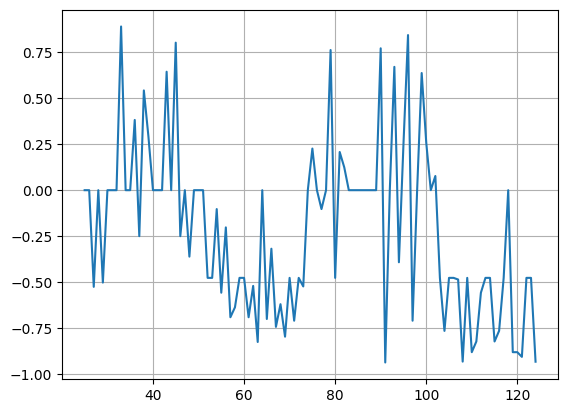

In [11]:
df.iloc[:100,:].vader_score.plot()

---

# **Feature Selection**

In [12]:
df

,keyword,text,target,tokens,hashtags,mentions,questions,exclamations,tokens_lemm,num_hashtags,num_mentions,num_questions,num_exclamations,num_words,num_letters,vader_score
25,ablaze,we always try to bring the heavy #metal #rt,0,"[always, try, bring, heavy, #metal, #rt]","[#metal, #rt]",[],[],[],"[always, try, bring, heavy, #metal, #rt]",2,0,0,0,9,43,0.0000
26,ablaze,#africanbaze breaking newsnigeria flag set abl...,1,"[#africanbaze, breaking, newsnigeria, flag, se...",[#africanbaze],[],[],[],"[#africanbaze, breaking, newsnigeria, flag, se...",1,0,0,0,8,56,0.0000
27,ablaze,crying out for more! set me ablaze,0,"[crying, !, set, ablaze]",[],[],[],[!],"[cry, !, set, ablaze]",0,0,0,1,7,34,-0.5255
28,ablaze,on plus side look at the sky last night it was...,0,"[plus, side, look, sky, last, night, ablaze]",[],[],[],[],"[plus, side, look, sky, last, night, ablaze]",0,0,0,0,12,53,0.0000
29,ablaze,@phdsquares #mufc they have built so much hype...,0,"[@phdsquares, #mufc, built, much, hype, around...",[#mufc],[@phdsquares],[],[],"[@phdsquares, #mufc, built, much, hype, around...",1,1,0,0,22,123,-0.5023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6062,wrecked,@jt_ruff23 @cameronhacker and i wrecked you both,0,"[@jt_ruff23, @cameronhacker, wrecked]",[],"[@jt_ruff23, @cameronhacker]",[],[],"[@jt_ruff23, @cameronhacker, wrecked]",0,2,0,0,7,48,0.0000
6063,wrecked,three days off from work and they have pretty ...,0,"[three, days, work, pretty, much, wrecked, hah...",[],[],[],[],"[three, day, work, pretty, much, wrecked, haha...",0,0,0,0,21,109,0.7783
6064,wrecked,#fx #forex #trading cramer igers 3 words that ...,0,"[#fx, #forex, #trading, cramer, igers, 3, word...","[#fx, #forex, #trading]",[],[],[],"[#fx, #forex, #trading, cramer, igers, 3, word...",3,0,0,0,11,67,0.0000
6065,wrecked,@engineshed great atmosphere at the british li...,0,"[@engineshed, great, atmosphere, british, lion...",[],[@engineshed],[],[],"[@engineshed, great, atmosphere, british, lion...",0,1,0,0,12,79,0.6249


In [13]:
df.columns

Index(['keyword', 'text', 'target', 'tokens', 'hashtags', 'mentions',
       'questions', 'exclamations', 'tokens_lemm', 'num_hashtags',
       'num_mentions', 'num_questions', 'num_exclamations', 'num_words',
       'num_letters', 'vader_score'],
      dtype='object')

In [14]:
selected_cols = ['num_hashtags','num_mentions','num_questions','num_exclamations','num_words','num_letters','vader_score','target']   #,'tokens_lemma']
df = df[selected_cols]
df

,num_hashtags,num_mentions,num_questions,num_exclamations,num_words,num_letters,vader_score,target
25,2,0,0,0,9,43,0.0000,0
26,1,0,0,0,8,56,0.0000,1
27,0,0,0,1,7,34,-0.5255,0
28,0,0,0,0,12,53,0.0000,0
29,1,1,0,0,22,123,-0.5023,0
...,...,...,...,...,...,...,...,...
6062,0,2,0,0,7,48,0.0000,0
6063,0,0,0,0,21,109,0.7783,0
6064,3,0,0,0,11,67,0.0000,0
6065,0,1,0,0,12,79,0.6249,0


In [15]:
numerical_features = df.to_numpy()

In [16]:
np.shape(numerical_features)

(6042, 8)

---

In [17]:
numerical_features_file_path = os.path.join(sdo_pkl, 'numerical_features.pkl')

In [18]:
# with open(numerical_features_file_path, 'wb') as file:
#     pickle.dump(numerical_features, file)

In [19]:
with open(numerical_features_file_path, 'rb') as file:
    numerical_features = pickle.load(file)
numerical_features

array([[ 2.    ,  0.    ,  0.    , ..., 43.    ,  0.    ,  0.    ],
       [ 1.    ,  0.    ,  0.    , ..., 56.    ,  0.    ,  1.    ],
       [ 0.    ,  0.    ,  0.    , ..., 34.    , -0.5255,  0.    ],
       ...,
       [ 3.    ,  0.    ,  0.    , ..., 67.    ,  0.    ,  0.    ],
       [ 0.    ,  1.    ,  0.    , ..., 79.    ,  0.6249,  0.    ],
       [ 0.    ,  0.    ,  0.    , ..., 53.    ,  0.    ,  0.    ]])

In [20]:
np.shape(numerical_features)

(6042, 8)

---

In [21]:
from Modularization.feature_engineering import FeatureEngineer
sia = SentimentIntensityAnalyzer()

feature_engineering = FeatureEngineer(df, 'tokens', 'text', sia)
feature_engineering.generate_counts()
feature_engineering.generate_sentiment_score()

selected_cols = ['num_hashtags','num_mentions','num_questions','num_exclamations','num_words','num_letters','sentiment_score','target']   #,'tokens_lemma']
df = df[selected_cols].to_numpy()

KeyError: 'tokens'